# Introducción a los Modelos de Clasificación

Las técnicas de **clasificación** son una parte esencial de Machine Learning, ya que aproximadamente el 70% de los problemas son de este tipo. Existen muchos algoritmos de clasificación, pero la ***Regresión Logística*** es común y es un método de regresión útil para resolver problemas de clasificación binaria.

Cuando usamos clasificación, el resultado es una **clase**, entre un número limitado de clases. Con clases nos referimos a categorías arbitrarias según el tipo de problema.

![Modelos de clasificación](modelos_clasificacion.jpg)

Un proceso binomial está caracterizado por la probabilidad de éxito, representada por p (es el único parámetro de su función de probabilidad), la probabilidad de fracaso se representa por q y, evidentemente, ambas probabilidades están relacionadas por p+q=1. En ocasiones, se usa el cociente p/q, denominado "odds", y que indica cuánto más probable es el éxito que el fracaso, como parámetro característico de la distribución binomial aunque, evidentemente, ambas representaciones son totalmente equivalentes.

Los modelos de Regresión Logística son modelos de regresión que permiten estudiar si una variable binomial depende, o no, de otra u otras variables (no necesariamente binomiales): Si una variable binomial de parámetro p es independiente de otra variable X, se cumple p=p|X, por consiguiente, un modelo de regresión es una función de p en X que a través del coeficiente de X permite investigar la relación anterior.

## Regresión Logística

La Regresión Logística es una técnica de aprendizaje automático para clasificación. Es una red neuronal en miniatura. De hecho, se trata de una red neuronal con exactamente una neurona. La Regresión Logística es un método estadístico para predecir clases binarias. El resultado o variable objetivo es de naturaleza dicotómica. Dicotómica significa que solo hay dos clases posibles. Por ejemplo, se puede utilizar para problemas de detección de correos spam o calcular la probabilidad de que ocurra un evento. La Regresión Logística lleva el nombre de la función utilizada en el núcleo del método, la función logística es también llamada **función Sigmoide**. Esta función es una curva en forma de S que puede tomar cualquier número de valor real y asignar a un valor entre **0** y **1**. 

![Función Sigmoide](Regresion_logistica.jpg)

Si una variable cualitativa con dos niveles se codifica como 1 y 0, matemáticamente es posible ajustar un modelo de regresión lineal por mínimos cuadrados β0+β1x. El problema de esta aproximación es que, al tratarse de una recta, para valores extremos del predictor, se obtienen valores de Y menores que 0 o mayores que 1, lo que entra en contradicción con el hecho de que las probabilidades siempre están dentro del rango [0,1].

Para evitar estos problemas, la Regresión Logística transforma el valor devuelto por la regresión lineal (β0+β1X) empleando una función cuyo resultado está siempre comprendido entre 0 y 1. Existen varias funciones que cumplen esta descripción, una de las más utilizadas es la función logística (también conocida como función sigmoide):

![Función Sigmoide](funcion_sigmoide_.png)

Z es la entrada neta, o la combinación lineal de pesos y características del modelo, que se puede calcular como:

![Z-Función Sigmoide](z_sigmoide.png)

Si la curva va a infinito positivo la predicción se convertirá en 1, y si la curva pasa el infinito negativo, la predicción se convertirá en 0. Si la salida de la función sigmoide es mayor que 0.5, podemos clasificar el resultado como 1 o SI, y si es menor que 0.5 podemos clasificarlo como 0 o NO, de forma que toma valores reales y los transforma en el rango [0,1], interceptando Ø(z) en 0.5. Por su parte un resultado de 0.75, hablamos en términos de probabilidad (75%).

![Entrenamiento RL](entrenamiento_regresionLog.png)

En resumen, la imagen anterior es lo que el modelo de regresión logística hace mientras es entrenado. La salida de la función sigmoide se interpreta como la probabilidad de que una muestra determinada pertenezca a la clase 1, dadas sus características x parametrizadas por los pesos como, Ø(z) =P(y=1|x; w). La probabilidad predicha se puede convertir en una salida binaria con una función de paso único (un cuantizador).

![Función matemática Y](funcion_matematica_y.png)

- Combinación lineal (a la izquierda de la neurona).
- Aplicación de la función logística (a la derecha de la neurona).

Así que todas las entradas se combinan con una línea con los coeficientes w. Y luego se aplica la función logística (también llamada sigmoide) al resultado.

In [21]:
# Función logística o Sigmoide
# Esta función debe funcionar para cuando z es un arreglo y no simplemente un escalar.
def sigmoid_function(x,w0, w1):
    '''Función equivalente a perceptrón con función de activación Sigmoide''' 
    
    z = w0 + w1*x # Función lineal
    activation = 1/(1+np.exp(-z))
    return activation

In [ ]:
def sigmoid(z):
    '''Función equivalente a perceptrón con función de activación Sigmoide''' 
    
    activation = 1/(1+np.exp(-z))
    return activation

Los modelos de regresión logística tienen **tres finalidades**:

- Cuantificar la importancia de la relación existente entre cada una de las covariables y la variable dependiente.
- Clarificar la existencia de interacción y confusión entre covariables respecto a la variable dependiente (es decir, los odds ratio para cada covariable).
- Clasificar individuos dentro de las categorías (presente/ausente) de la variable dependiente.

In [1]:
# Importación de librerías
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Generación de datos. Un atributo, dos clases.
X, y = make_blobs(n_samples=1000, centers=2, n_features=1,
                  random_state=1, cluster_std= 1.5) # Esto es simular datos

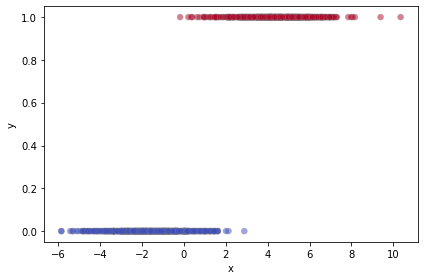

In [3]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

In [4]:
# Instanciamos el modelo y lo entrenamos
clf = LogisticRegression().fit(X,y)

In [5]:
# Realizamos la predicción
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.974

In [6]:
# Parámetros obtenidos
print(clf.coef_, clf.intercept_)

[[2.44855129]] [-3.39207913]


In [35]:
clf.coef_[0][0]

2.44855128566888

In [36]:
clf.intercept_[0]

-3.392079129427139

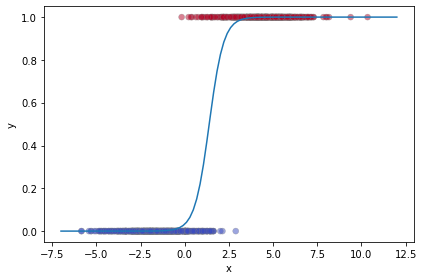

In [25]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

x_plot = np.linspace(-7,12,100)
plt.plot(x_plot, sigmoid_function(x_plot,clf.intercept_[0], clf.coef_[0][0]))
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Otra forma de obtener esa curva habría sido usando el método `predict_proba` del clasificador:

In [42]:
x_plot = np.linspace(-7,12,100)
x_plot.reshape(-1,1).shape
clf.predict_proba(x_plot.reshape(-1,1))[:,1].shape

(100,)

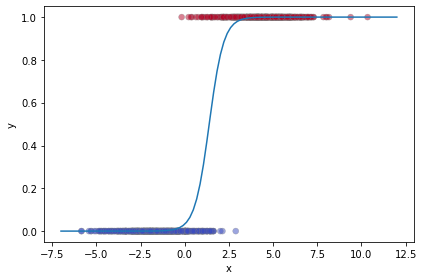

In [26]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

x_plot = np.linspace(-7,12,100)
y_plot = clf.predict_proba(x_plot.reshape(-1,1))[:,1]
plt.plot(x_plot, y_plot)

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

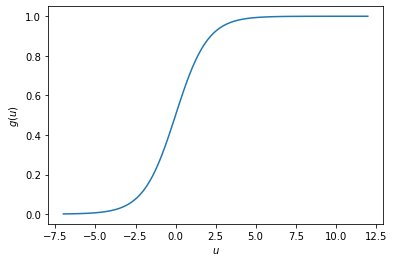

In [44]:
# Otra manera de representar la función sigmoide
u=np.linspace(-7,12,100)
g = np.exp(u)/(1 + np.exp(u))
plt.plot(u,g)
plt.xlabel('$u$')
plt.ylabel('$g(u)$')
plt.show()

## Función de coste de la Regresión Logística

El aprendizaje se realiza con optimización numérica, por ejemplo, con gradiente descendiente. No hay ninguna fórmula que nos de los coeficientes óptimos W, sino que tenemos que estimarlos. La función de coste que optimizamos es la siguiente:

$$
J = -\frac{1}{n}\sum_{i=1}^{n}y_i\ln(\hat{y}_i) + (1-y_i)\ln(1-\hat{y}_i)
$$

Promedio de la perdida a lo largo de todos los ejemplos.

$$
\hat{y}_i = \frac{1}{1 + e^{-(w0 + w1x)}}
$$

El modelo de Regresión Logística es aquel que minimiza el costo a lo largo de todos los datos de entrenamiento, nótese que los pesos siguen siendo los valores que se deben minimizar.

### Ejercicio 1

Implementar la función `compute_predictions(X, w, return_probs=False)` que permite hacer predicciones usando la Regresión Logística. Incluir un argumento adicional que permita retornar las probabilidades de que los inputs pertenezcan a la clase 1.

### Ejercicio 2

Implementar la función de coste: `compute_cost(y, y_pred)` , la cual calcule el costo de las predicciones actuales del modelo de Regresión Logística.

## Optimización Gradiente descendente

Este método de optimización implica que debemos calcular el gradiente de la función de costo con respecto a los pesos del modelo. Solución de gradiente descendiente: para encontrar el mínimo debemos recorrer la función de costo en la dirección que el gradiente nos dicta en cada punto.

La **Tasa de aprendizaje** controla que tan grandes son los pasos (longitud) que se dan en cada iteración, un hiperparámetro.

Se puede definir un criterio de convergencia o un número de iteraciones.

![Gradiente Descendente](gradiente_descendente.png)

### Ejercicio 3

Implementar la función `compute_gradient(X, y, y_pred)`, la cual es necesaria para la implementación de gradiente descendiente.

### Ejercicio 4

Implementar la función `optimize_logistic_regression(X, y, learning_rate, num_iterations)`, la cual calcula los parámetros de la Regresión Logística. El criterio de parada será un número de iteraciones. Guardar en una lista el costo y los pesos de cada iteración.